In [1]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
boston_dataset=datasets.load_boston()
boston_dataset

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston_pd=pd.DataFrame(boston_dataset.data)
boston_pd.columns =boston_dataset.feature_names
boston_pd_target =np.asarray(boston_dataset.target)
boston_pd['House Price']=pd.Series(boston_pd_target)

x=boston_pd.iloc[:,:-1]
y=boston_pd.iloc[:,-1]

In [6]:
boston_pd


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.35)

In [8]:
xtest


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
175,0.06664,0.0,4.05,0.0,0.510,6.546,33.1,3.1323,5.0,296.0,16.6,390.96,5.33
333,0.05083,0.0,5.19,0.0,0.515,6.316,38.1,6.4584,5.0,224.0,20.2,389.71,5.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
262,0.52014,20.0,3.97,0.0,0.647,8.398,91.5,2.2885,5.0,264.0,13.0,386.86,5.91
335,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01


In [9]:
lreg=LinearRegression()
lreg.fit(xtrain,ytrain)

LinearRegression()

In [10]:
lreg_ypred=lreg.predict(xtest)
lreg_ypred

array([ 1.68434196e+01,  1.95311509e+01,  1.39728886e+01,  3.08449995e+01,
        2.22831640e+01,  1.49965320e+01, -1.98501828e-02,  1.44041264e+01,
        2.01585605e+01,  2.10173567e+01,  2.12366437e+01,  2.91883741e+01,
        3.12676268e+01,  1.89989511e+01,  3.56032542e+01,  1.05929804e+01,
        1.31885720e+01,  2.20684603e+01,  2.45903483e+01,  1.99220756e+01,
        2.38174674e+01,  1.86347328e+01,  1.71508961e+01,  1.14371271e+01,
        1.63621642e+01,  1.94562324e+01,  3.50813029e+01,  1.89089143e+01,
        1.95023909e+01,  1.50908509e+01,  2.73958239e+01,  3.22706914e+01,
        2.38783918e+01,  1.08235647e+01,  3.76759305e+01,  2.11290425e+01,
        2.31719373e+01,  5.25145758e+00,  2.80603413e+01,  2.10659979e+01,
        2.27375798e+01,  2.57370734e+01,  2.86863262e+01,  2.30994085e+01,
        2.21496528e+01,  1.92475328e+01,  2.05424118e+01,  1.85888225e+01,
        2.61166228e+01,  2.10979151e+01,  1.20573496e+01,  3.86367706e+01,
        2.21375747e+01,  

In [11]:
mean_sequred_error=np.mean((lreg_ypred-ytest)**2)
print('Mean squared Erroron test set :',mean_sequred_error)

Mean squared Erroron test set : 31.69475413217985


In [14]:
lreg_coefficient =pd.DataFrame()
lreg_coefficient['columns']=xtrain.columns
lreg_coefficient['Coefficient Estimate'] =pd.Series(lreg.coef_)
print(lreg_coefficient)

    columns  Coefficient Estimate
0      CRIM             -0.114117
1        ZN              0.043868
2     INDUS              0.038059
3      CHAS              1.753824
4       NOX            -15.194394
5        RM              4.755309
6       AGE             -0.026551
7       DIS             -1.415367
8       RAD              0.271935
9       TAX             -0.014061
10  PTRATIO             -0.961704
11        B              0.005988
12    LSTAT             -0.399204


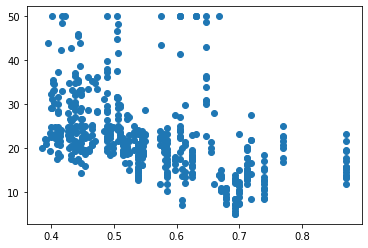

In [16]:
plt.scatter(boston_pd['NOX'],boston_pd['House Price'])

In [19]:
import seaborn as sns

<Axes: xlabel='Coefficient Estimate', ylabel='columns'>

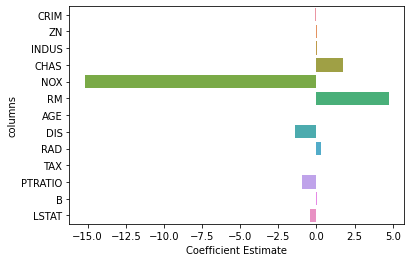

In [20]:
sns.barplot(x='Coefficient Estimate',y='columns',data=lreg_coefficient)

In [21]:
from sklearn.linear_model import Ridge

In [22]:
ridgeR=Ridge(alpha=2)
ridgeR.fit(xtrain,ytrain)
ypred=ridgeR.predict(xtest)

In [23]:
mean_squared_error_Ridge=np.mean((ypred-ytest)**2)

In [24]:
mean_squared_error_Ridge

32.56714907285886

In [25]:
ridge_coefficient =pd.DataFrame()
ridge_coefficient['columns']=xtrain.columns
ridge_coefficient['Linear Coeff.Estimate'] =pd.Series(lreg.coef_)
ridge_coefficient['Ridge Coeff.Estimate'] =pd.Series(ridgeR.coef_)
print(ridge_coefficient)

    columns  Linear Coeff.Estimate  Ridge Coeff.Estimate
0      CRIM              -0.114117             -0.112084
1        ZN               0.043868              0.046316
2     INDUS               0.038059             -0.012167
3      CHAS               1.753824              1.673914
4       NOX             -15.194394             -4.952944
5        RM               4.755309              4.772140
6       AGE              -0.026551             -0.036040
7       DIS              -1.415367             -1.279790
8       RAD               0.271935              0.247534
9       TAX              -0.014061             -0.014940
10  PTRATIO              -0.961704             -0.848851
11        B               0.005988              0.006536
12    LSTAT              -0.399204             -0.405506


In [26]:
from sklearn.linear_model import Lasso

In [28]:
lasso=Lasso(alpha=0.05)
lasso.fit(xtrain,ytrain)
ypred1=lasso.predict(xtest)

In [29]:
mean_squared_error=np.mean((ypred-ytest)**2)
mean_squared_error

32.56714907285886

In [40]:
lasso_coefficient =pd.DataFrame()
lasso_coefficient['columns']=xtrain.columns
lasso_coefficient['Linear Coeff.Estimate'] =pd.Series(lreg.coef_)
lasso_coefficient['Lasso Coeff.Estimate'] =pd.Series(lasso.coef_)
ridge_coefficient['Ridge Coeff.Estimate'] =pd.Series(ridgeR.coef_)
print(lasso_coefficient)

    columns  Linear Coeff.Estimate  Lasso Coeff.Estimate
0      CRIM              -0.114117             -0.109650
1        ZN               0.043868              0.047099
2     INDUS               0.038059             -0.027168
3      CHAS               1.753824              1.096854
4       NOX             -15.194394             -0.000000
5        RM               4.755309              4.814018
6       AGE              -0.026551             -0.039353
7       DIS              -1.415367             -1.183693
8       RAD               0.271935              0.235628
9       TAX              -0.014061             -0.015598
10  PTRATIO              -0.961704             -0.794488
11        B               0.005988              0.006890
12    LSTAT              -0.399204             -0.408318


In [34]:
from sklearn.linear_model import ElasticNet

In [37]:
e_net=ElasticNet(alpha=0.3,l1_ratio=0.9)
e_net.fit(xtest,ytest)

ElasticNet(alpha=0.3, l1_ratio=0.9)

In [38]:
ypred_elastic=e_net.predict(xtest)


In [42]:
mean_squared_error=np.mean((ypred-ytest)**2)
mean_squared_error

32.56714907285886

In [46]:
e_net_coefficient =pd.DataFrame()
e_net_coefficient['columns']=xtrain.columns
e_net_coefficient['Linear Coeff.Estimate'] =pd.Series(lreg.coef_)
e_net_coefficient['Lasso Coeff.Estimate'] =pd.Series(lasso.coef_)
e_net_coefficient['e_net.Estimate'] =pd.Series(e_net.coef_)
e_net_coefficient['Ridge Coeff.Estimate'] =pd.Series(ridgeR.coef_)
print(e_net_coefficient)

    columns  Linear Coeff.Estimate  Lasso Coeff.Estimate  e_net.Estimate  \
0      CRIM              -0.114117             -0.109650       -0.100589   
1        ZN               0.043868              0.047099        0.049506   
2     INDUS               0.038059             -0.027168       -0.104218   
3      CHAS               1.753824              1.096854        0.000000   
4       NOX             -15.194394             -0.000000       -0.000000   
5        RM               4.755309              4.814018        2.114270   
6       AGE              -0.026551             -0.039353        0.063988   
7       DIS              -1.415367             -1.183693       -0.970249   
8       RAD               0.271935              0.235628        0.189420   
9       TAX              -0.014061             -0.015598       -0.007078   
10  PTRATIO              -0.961704             -0.794488       -0.694709   
11        B               0.005988              0.006890        0.014551   
12    LSTAT 